### 02_object_id_frequency analysis

### Assumptions
1. Segment the session by participant_id continuity within each event_id,
2. If object_id appears repeatedly within an event, or there is "block aggregation", it is possible to proceed to the next step of analysis

### Finding
However, according to the results shown in the image, there is no way to manually verify. 

### Reason
1. Because we don't have a timestamp. We can't know "who comes first and who comes later", so even if we see the same participant_id appear multiple times, we can't guarantee that these records are completed in the same session.
2. This type of session_id cannot match data with timestamps.
3. Manual verification of the order of sessions is also impossible in the absence of time. So give up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading 
df = pd.read_csv("/Users/olivey/Downloads/sample.csv")
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# data without create_at 
df_no_time = df[df['created_at'].isna()].copy()

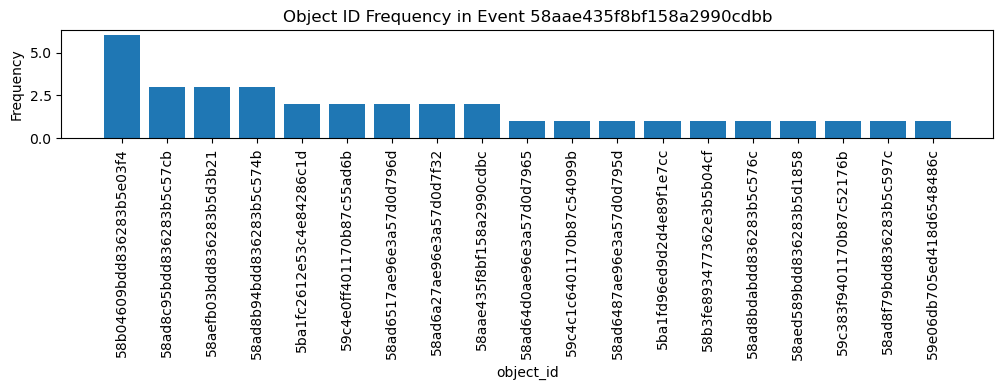

count    19.000000
mean      1.842105
std       1.258887
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       6.000000
Name: count, dtype: float64
 The top few object_id occurrence frequencies:
object_id
58b04609bdd836283b5e03f4    6
58ad8c95bdd836283b5c57cb    3
58aefb03bdd836283b5d3b21    3
58ad8b94bdd836283b5c574b    3
5ba1fc2612e53c4e84286c1d    2
59c4e0ff401170b87c55ad6b    2
58ad6517ae96e3a57d0d796d    2
58ad6a27ae96e3a57d0d7f32    2
58aae435f8bf158a2990cdbc    2
58ad64d0ae96e3a57d0d7965    1
Name: count, dtype: int64


In [3]:
# find the event_id with the most records
target_event = df_no_time['event_id'].value_counts().idxmax()
df_event = df_no_time[df_no_time['event_id'] == target_event]

# frequency of object_id
object_counts = df_event['object_id'].value_counts()


plt.figure(figsize=(10, 4))
plt.bar(object_counts.index.astype(str), object_counts.values)
plt.xticks(rotation=90)
plt.title(f"Object ID Frequency in Event {target_event}")
plt.xlabel("object_id")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#statistics 
print(object_counts.describe())

print(" The top few object_id occurrence frequencies:")
print(object_counts.head(10))


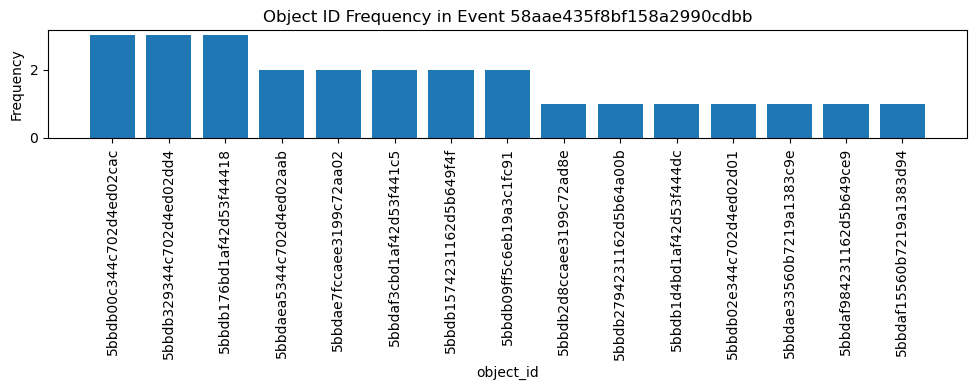

In [4]:
# FOR ANOTHER HIGH FREQUENCY EVENT_ID
df_event = df_no_time[df_no_time['event_id'] =='5bbda4ff560b7219a13833bb']
object_counts = df_event['object_id'].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(object_counts.index.astype(str), object_counts.values)
plt.xticks(rotation=90)
plt.title(f"Object ID Frequency in Event {target_event}")
plt.xlabel("object_id")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()